# Multivariate Gaussian distribution

## Built-in function mode

### Equally spaced data

Initially we have d values which are equally spaced

In [1]:
import numpy as np
d = 100 # dimensionality
x = np.arange(1, d+1, 1) # data equally spaced
mju = np.zeros(d) # mean vector

Now they can be plotted

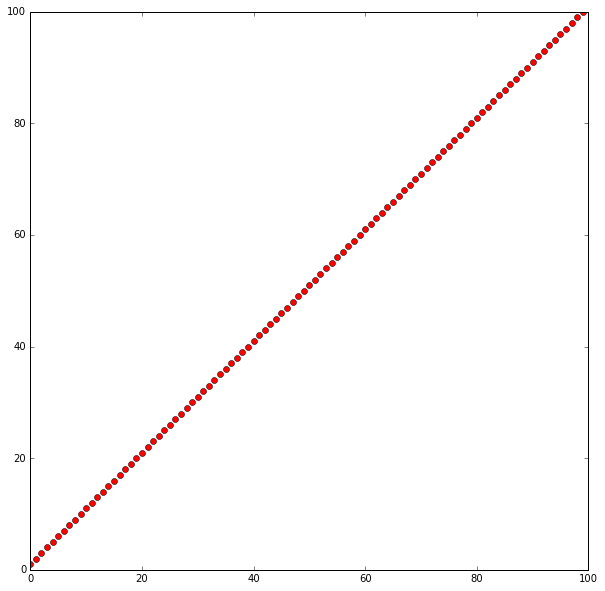

In [3]:
import matplotlib.pyplot as mp
% matplotlib inline
fig = mp.figure(figsize=(10,10)) # scale of the plot
mp.plot(x, 'ro')
mp.show()

My kernel function: $$k(x,x') = \alpha * \exp(-\frac{\|x-x'\|^2}{2l^2})$$

In [4]:
def mykernel(x1,x2):
    a = 1
    l = 2
    return a*np.exp(-((x1-x2)**2)/(2*l**2))

Function for obtaining the covariance matrix:

In [5]:
def getkernmatrix(x,y):
    k1 = np.size(x)
    k2 = np.size(y)
    matrix = np.zeros((k1,k2))
    for i in range(0,k1):
        for j in range(0,k2):
            matrix[i,j] = mykernel(x[i],y[j])
            
    return matrix

Covariance matrix for our data:

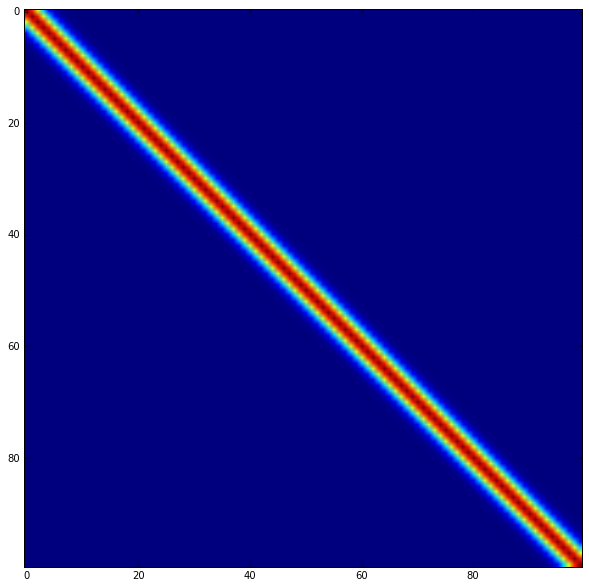

In [6]:
K = getkernmatrix(x,x)

# visualization of kernel matrix
fig = mp.figure(figsize=(10,10)) # scale of the plot
image = mp.imshow(K)
mp.show()

One realisation of multivariate Gaussian diatribution:

In [7]:
R = np.random.multivariate_normal(mju,K)

In [8]:
print(R)

[-0.96203922  0.09318064  0.96281349  1.41595176  1.31969388  0.55913217
 -0.47829647 -0.97688021 -0.72338729 -0.32835635 -0.26106345 -0.52700873
 -0.96523992 -1.36242539 -1.57648817 -1.54787156 -1.23965183 -0.92079818
 -1.0084324  -1.31487375 -1.16621916 -0.22369829  1.07946786  2.05622598
  2.51448602  2.51602649  2.16019051  1.70405568  1.29712469  0.88851423
  0.44386296  0.03778331 -0.22015423 -0.37551821 -0.54917552 -0.5764734
 -0.1888769   0.34249871  0.47631938  0.10195607 -0.65099663 -1.5848517
 -2.16669586 -1.85933345 -0.89973734 -0.1243004   0.14085693  0.08925184
 -0.28650274 -0.89780314 -1.10284288 -0.49046191  0.32430189  0.87300919
  1.51766522  2.14084709  2.15474974  1.69769335  1.28100984  0.96785675
  0.67777008  0.48693011  0.3815462   0.15490815 -0.28605545 -0.8313798
 -1.17949674 -0.85431171  0.0466019   0.65613636  0.52497883  0.06484843
 -0.19595144 -0.04631762  0.2686713   0.35686671  0.19950092 -0.05414344
 -0.36002636 -0.68186469 -0.93531951 -1.1702755  -1.40

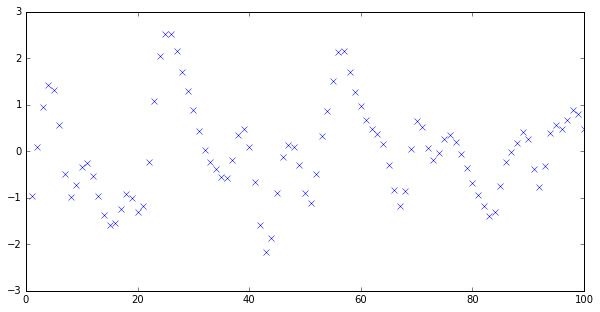

In [9]:
fig = mp.figure(figsize=(10,5)) # scale of the plot
mp.plot(x,R,'bx')
mp.show()

### Not equally spaced data

Now assume that our data is not equally spaced

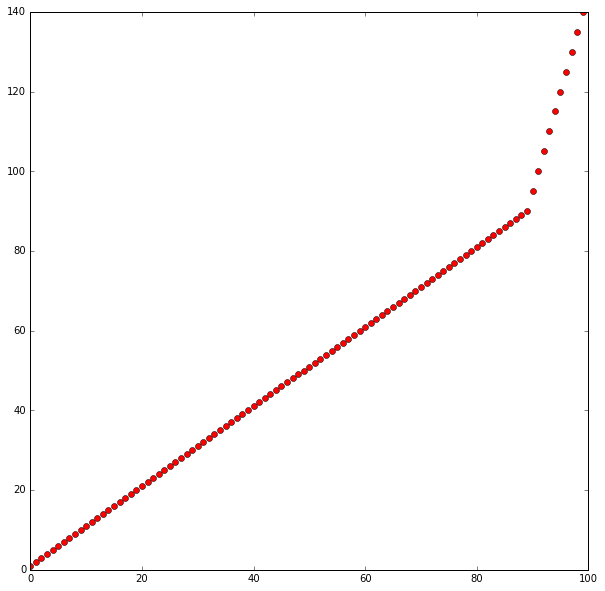

In [10]:
x[90:100] = np.arange(95, 145, 5)
fig = mp.figure(figsize=(10,10)) # scale of the plot
mp.plot(x, 'ro')
mp.show()

In [11]:
print(x)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  95 100 105 110 115 120 125 130 135 140]


Obtained covariance matrix:

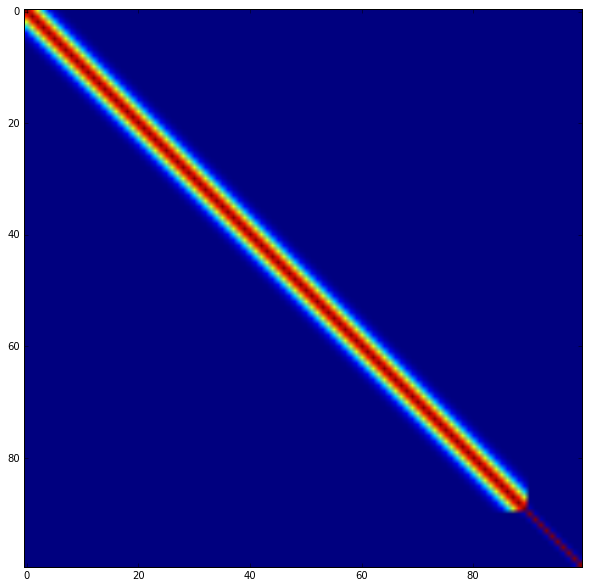

In [12]:
K = getkernmatrix(x,x)

# visualization of kernel matrix
fig = mp.figure(figsize=(10,10)) # scale of the plot
image = mp.imshow(K)
mp.show()

m realisations of multivariate Gaussian distribution with respect to new data:

In [13]:
m = 5 # number of realisations
R = np.random.multivariate_normal(mju,K,m)

In [14]:
print(R)

[[ -7.35649486e-01  -3.69537235e-01  -1.41122163e-01   5.31038473e-03
    3.59814319e-01   7.65465614e-01   8.34831549e-01   7.07274268e-01
    8.23855134e-01   1.17174332e+00   1.40595352e+00   1.48143120e+00
    1.68505424e+00   2.00630061e+00   1.99983994e+00   1.48578941e+00
    7.85342959e-01   2.17915803e-01  -3.24321286e-01  -9.28808292e-01
   -1.18069730e+00  -9.27200384e-01  -5.00111626e-01   7.23305820e-02
    7.38714780e-01   1.07805163e+00   8.99666649e-01   2.52495988e-01
   -7.15481082e-01  -1.47682487e+00  -1.57276612e+00  -1.18441304e+00
   -7.09222153e-01  -3.00732560e-01   1.06551338e-01   5.79614657e-01
    9.08020532e-01   8.55329218e-01   5.18098276e-01  -7.82664314e-02
   -1.09391502e+00  -2.01147602e+00  -1.80239225e+00  -5.95475039e-01
    2.13915391e-01  -2.92407288e-01  -1.58981883e+00  -2.52374459e+00
   -2.51104141e+00  -1.63712290e+00  -4.17773528e-01   1.55122842e-01
   -3.98522968e-01  -1.14196017e+00  -1.13959181e+00  -7.08287756e-01
   -4.11876789e-01  

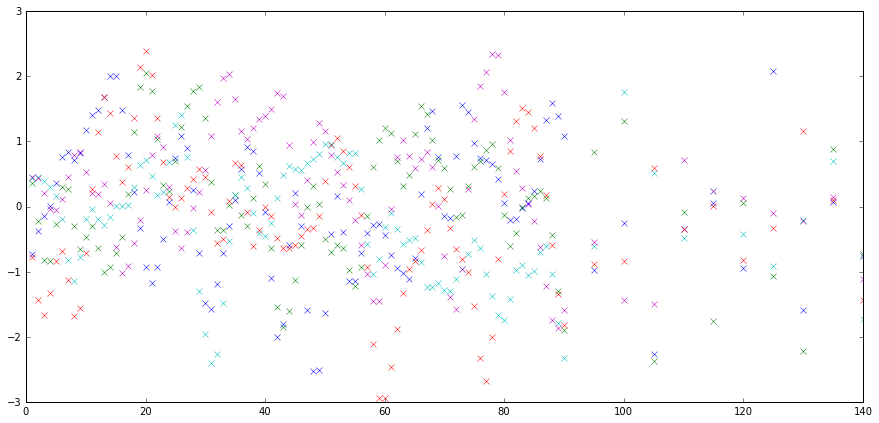

In [15]:
fig = mp.figure(figsize=(15,7)) # scale of the plot
mp.plot((np.ones((m,d)) * x).transpose(), R.transpose(),'x')
mp.show()

In [16]:
# there is no special function for ordinary plot in seaborn

### Conditional distribution (with known parameters)

Now assume that we already know some parameters

In [17]:
# conditions:
f_cond = [1, 1]
x_cond = [40, 80]
mju_cond = [0, 0]

Kernel matrix for conditional Gaussian distribution:

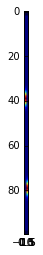

In [18]:
K_x_c = getkernmatrix(x,x_cond)

# visualization of kernel matrix
image = mp.imshow(K_x_c)
mp.show()

Mean vector and covariance matrix:

In [19]:
from numpy.linalg import inv
invK_c_c = inv(getkernmatrix(x_cond,x_cond))

# A = (f_cond - 0)
# B = K_x_c*invK_c_c
# C = B*A
# mju_cond = mju + C

A = list(np.array(f_cond) - np.array(mju_cond))
B = np.matmul(K_x_c,invK_c_c)
C = np.matmul(B,A)

MU = list(np.array(mju) + np.array(C))
SIGMA = list(np.array(K) - np.array(np.matmul(np.matmul(K_x_c,invK_c_c),K_x_c.transpose())))

m realisations of multivariate conditional Gaussian distribution:

In [20]:
m = 10 # number of realisations
RC = np.random.multivariate_normal(MU,SIGMA,m)

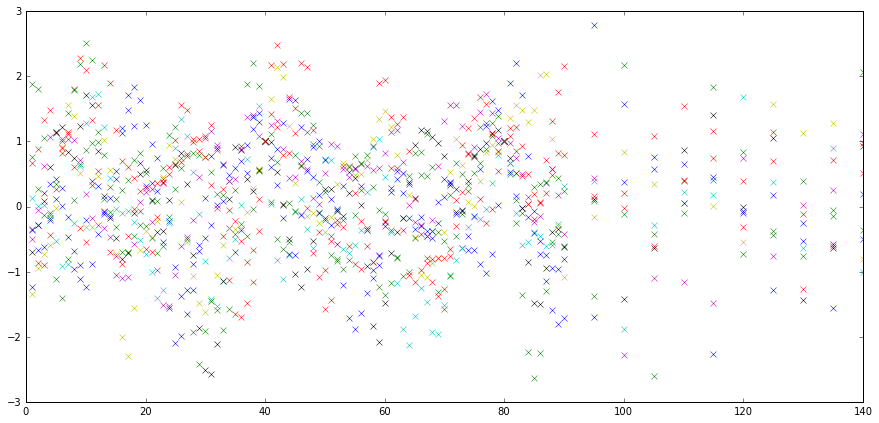

In [21]:
mp.figure(figsize=(15,7))
mp.plot((np.ones((m,d)) * x).transpose(), RC.transpose(), 'x')
mp.show()

All the lines interracts at two points (40,1) and (80,1) which are our conditions.

## Own function mode

In [23]:
def multvarcondens(K,n,f,mju):
    # preallocation for speed
    K1n = np.zeros((1,n-1))
    Kn1 = np.zeros((n-1,1))
    Knn = np.zeros((n-1,n-1))
    Fmju = np.zeros((n-1,1))
    
    for i in range(0,n):
        K1n[1,i] = K(n,n-i)
        Kn1[i,1] = K(n-i,n)
        Fmju[i,1] = f(n-i,1)-mju(n-i,1)
        for j in range(0,n):
            Knn[i,j] = K[n-i,n-j]
    
    #R = chol(Knn)
    #S = R^(-1)
    #invKnn = S*S'

    meann = mju(n,1) + K1n*invKnn*Fmju
    var = K(n,n) - K1n*invKnn*Kn1
            
    return meann,var

In [ ]:
N = 100
m = 1
L = 8
x = 1:1:N
mju = zeros(N,1)
x(90:100) = 90:5:140
K = getkernmatrix(x)
I = label2rgb(int8(K))
%figure(1); imshow(I)

color = ['y','m','c','r','g','b','w','k']

for j=1:L
    f_cond = zeros(N,m)
    f_cond(40,1) = 1
    f_cond(80,1) = 1

    f_cond(1,:) = random('Normal', mju(1,1), sqrt(K(1,1)), 1, m)

    for i=2:N
        if f_cond(i,:) == 0
            [MU,SIGMA] = multvarcondens(K,i,f_cond,mju)
            f_cond(i,:) = random('Normal', MU, sqrt(SIGMA), 1, m)
        end
    end
    
    plot(x,f_cond(:,1),'-','Color',color(j))
    
end

In [ ]:
# TODO: try with different kernel and with noise

In [24]:
# TODO: rewrite in matrix form